## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Loading the Dataset

In [3]:
final_df = pd.read_csv('credit_data.csv')
final_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1112b,CUS_0x3943,February,Jessicaf,30,#F%$D@*&8,Lawyer,18859.38,1360.61500,6,4,5640,4,"Auto Loan, Payday Loan, Auto Loan, and Payday ...",14,15,9.41,6.0,Standard,330.26,27.911640,13 Years and 3 Months,Yes,40.292010,59.60664697,Low_spent_Large_value_payments,306.1628428,Standard
1,0x22dd0,CUS_0x90d0,July,Langel,39,047-17-4695,Writer,46477.56,4059.13000,7,10,24,6_,"Auto Loan, Student Loan, Debt Consolidation Lo...",46,22,6.67,12.0,Bad,1799.87,32.851676,9 Years and 2 Months,NM,212.248190,109.4092923,High_spent_Medium_value_payments,334.2555174,Poor
2,0x19ae8,CUS_0x6e95,July,Louise Eganb,52,369-09-8718,Mechanic,153147.64,12915.30333,5,4,3,1,Payday Loan,3,NaN,11.24,1.0,Good,1222.96,40.264738,25 Years and 8 Months,No,81.918963,152.9087468,High_spent_Medium_value_payments,1306.702624,Poor
3,0x1e584,CUS_0x26da,March,Alwyn Scottz,39,957-74-9111,Doctor,16833.105,1542.75875,5,5,4,4,"Payday Loan, Personal Loan, Auto Loan, and Hom...",7,15,5.99,6.0,Good,35.71,30.634617,19 Years and 4 Months,No,51.702938,160.0692534,Low_spent_Small_value_payments,232.5036833,Good
4,0x648a,CUS_0x473a,May,Roumeliotisu,31,720-32-3844,Media_Manager,131693.37_,10696.44750,0,7,10,3,"Student Loan, Debt Consolidation Loan, and Mor...",27,3,1.78,6.0,Good,1428.94,29.807968,22 Years and 3 Months,No,208.858473,1084.704299,Low_spent_Medium_value_payments,56.08197761,Standard


In [4]:
final_df.shape

(49999, 28)

In [5]:
final_df.columns = [x.lower() for x in final_df.columns]
final_df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

### Removing Non-Related or Unneccessary Columns

In [6]:
final_df.drop(['id','customer_id','month','name','ssn','type_of_loan','credit_history_age'], axis=1, inplace=True)

In [7]:
final_df.head()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,30,Lawyer,18859.38,1360.61500,6,4,5640,4,14,15,9.41,6.0,Standard,330.26,27.911640,Yes,40.292010,59.60664697,Low_spent_Large_value_payments,306.1628428,Standard
1,39,Writer,46477.56,4059.13000,7,10,24,6_,46,22,6.67,12.0,Bad,1799.87,32.851676,NM,212.248190,109.4092923,High_spent_Medium_value_payments,334.2555174,Poor
2,52,Mechanic,153147.64,12915.30333,5,4,3,1,3,NaN,11.24,1.0,Good,1222.96,40.264738,No,81.918963,152.9087468,High_spent_Medium_value_payments,1306.702624,Poor
3,39,Doctor,16833.105,1542.75875,5,5,4,4,7,15,5.99,6.0,Good,35.71,30.634617,No,51.702938,160.0692534,Low_spent_Small_value_payments,232.5036833,Good
4,31,Media_Manager,131693.37_,10696.44750,0,7,10,3,27,3,1.78,6.0,Good,1428.94,29.807968,No,208.858473,1084.704299,Low_spent_Medium_value_payments,56.08197761,Standard


In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       49999 non-null  object 
 1   occupation                49999 non-null  object 
 2   annual_income             49999 non-null  object 
 3   monthly_inhand_salary     42481 non-null  float64
 4   num_bank_accounts         49999 non-null  int64  
 5   num_credit_card           49999 non-null  int64  
 6   interest_rate             49999 non-null  int64  
 7   num_of_loan               49999 non-null  object 
 8   delay_from_due_date       49999 non-null  int64  
 9   num_of_delayed_payment    46545 non-null  object 
 10  changed_credit_limit      49999 non-null  object 
 11  num_credit_inquiries      49005 non-null  float64
 12  credit_mix                49999 non-null  object 
 13  outstanding_debt          49999 non-null  object 
 14  credit

In [9]:
final_df.describe()

,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,delay_from_due_date,num_credit_inquiries,credit_utilization_ratio,total_emi_per_month
count,42481.000000,49999.000000,49999.000000,49999.000000,49999.000000,49005.000000,49999.000000,49999.000000
mean,4177.968252,16.696314,22.003500,73.972179,21.090102,27.718498,32.307102,1391.802221
std,3177.107575,115.654383,126.475425,472.984783,14.841946,193.126715,5.124387,8213.157530
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.719745,0.000000
25%,1621.285833,4.000000,4.000000,8.000000,10.000000,3.000000,28.071323,30.305906
50%,3080.353333,6.000000,6.000000,13.000000,18.000000,6.000000,32.316951,68.849588
75%,5937.140000,7.000000,7.000000,20.000000,28.000000,9.000000,36.524944,162.069560
max,15204.633330,1798.000000,1497.000000,5797.000000,67.000000,2597.000000,50.000000,82256.000000


### Checking for Duplication

In [10]:
final_df.duplicated().value_counts()

False    49999
dtype: int64

### Finding Null Values

In [11]:
final_df.isnull().sum().reset_index().rename(columns={'index':'feature_name',0:'null_counts'})

,feature_name,null_counts
0,age,0
1,occupation,0
2,annual_income,0
3,monthly_inhand_salary,7518
4,num_bank_accounts,0
5,num_credit_card,0
6,interest_rate,0
7,num_of_loan,0
8,delay_from_due_date,0
9,num_of_delayed_payment,3454


### Data Cleaning

In [13]:
def amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [14]:
final_df["amount_invested_monthly"] = final_df["amount_invested_monthly"].apply(amount_invested_monthly)
final_df["amount_invested_monthly"] = final_df["amount_invested_monthly"].astype(float)

In [16]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif "_" in str(value):
        return str(value).replace("_","")
    elif str(value) == "_":
        return str(value)
    else:
        return str(value)

In [17]:
final_df["num_of_delayed_payment"] = final_df["num_of_delayed_payment"].apply(filter_delayed_payments)
final_df["num_of_delayed_payment"] = final_df["num_of_delayed_payment"].astype(np.float64)

In [18]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [20]:
final_df.drop(final_df[final_df['monthly_balance']=='__-333333333333333333333333333__'].index, inplace = True)
for i in ['age','annual_income','num_of_loan','outstanding_debt','monthly_balance']:
    final_df[i] = final_df[i].apply(filter_general)
    final_df[i] = final_df[i].astype(np.float64)
    print(i + "Successfully Cleaned")

ageSuccessfully Cleaned
annual_incomeSuccessfully Cleaned
num_of_loanSuccessfully Cleaned
outstanding_debtSuccessfully Cleaned
monthly_balanceSuccessfully Cleaned


In [22]:
final_df['changed_credit_limit'] = final_df['changed_credit_limit'].apply(lambda x:x.split("-")[-1])
final_df.drop(final_df[final_df['changed_credit_limit']=="_"].index,inplace=True)
final_df['changed_credit_limit'] = final_df['changed_credit_limit'].astype(float)

In [23]:
final_df['occupation'].value_counts()

_______          3490
Engineer         3193
Lawyer           3182
Media_Manager    3114
Architect        3101
Developer        3079
Mechanic         3075
Teacher          3065
Scientist        3049
Entrepreneur     3021
Accountant       3021
Musician         2947
Journalist       2914
Doctor           2903
Manager          2884
Writer           2883
Name: occupation, dtype: int64

In [24]:
final_df['occupation'] = final_df['occupation'].replace('_______',np.nan)
final_df['occupation'] = final_df['occupation'].fillna(np.random.choice(pd.Series(['Scientist','Teacher','Lawyer','Architect',
'Engineer','Mechanic','Accountant','Media_Manager','Developer','Entrepreneur','Doctor','Journalist','Manager','Musician','Writer'])))

In [25]:
final_df['credit_mix'] = final_df['credit_mix'].replace('_',np.nan)
final_df['credit_mix'] = final_df['credit_mix'].fillna(np.random.choice(pd.Series(['Standard','Good','Bad'])))

In [26]:
final_df['payment_of_min_amount'] = final_df['payment_of_min_amount'].replace('NM',np.nan)
final_df['payment_of_min_amount'] = final_df['payment_of_min_amount'].fillna(np.random.choice(pd.Series(['Yes','No'])))

In [27]:
final_df['payment_behaviour'].value_counts()

Low_spent_Small_value_payments      12469
High_spent_Medium_value_payments     8639
High_spent_Large_value_payments      6765
Low_spent_Medium_value_payments      6737
High_spent_Small_value_payments      5546
Low_spent_Large_value_payments       5044
!@9#%8                               3721
Name: payment_behaviour, dtype: int64

In [28]:
final_df['payment_behaviour'] = final_df['payment_behaviour'].replace('!@9#%8',np.nan)
final_df['payment_behaviour'] = final_df['payment_behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Medium_value_payment',
'Low_spent_Small_value_payments','Low_spent_Medium_value_payments','High_spent_Large_value_payments','High_spent_Small_value_payments','Low_spent_Large_value_payments'])))

In [29]:
for i in ['monthly_inhand_salary','num_of_delayed_payment','num_credit_inquiries','amount_invested_monthly','monthly_balance']:
    final_df[i].fillna(final_df[i].median(), inplace=True)

In [30]:
final_df.head()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,30.0,Lawyer,18859.380,1360.61500,6,4,5640,4.0,14,15.0,9.41,6.0,Standard,330.26,27.911640,Yes,40.292010,59.606647,Low_spent_Large_value_payments,306.162843,Standard
1,39.0,Writer,46477.560,4059.13000,7,10,24,6.0,46,22.0,6.67,12.0,Bad,1799.87,32.851676,Yes,212.248190,109.409292,High_spent_Medium_value_payments,334.255517,Poor
2,52.0,Mechanic,153147.640,12915.30333,5,4,3,1.0,3,14.0,11.24,1.0,Good,1222.96,40.264738,No,81.918963,152.908747,High_spent_Medium_value_payments,1306.702624,Poor
3,39.0,Doctor,16833.105,1542.75875,5,5,4,4.0,7,15.0,5.99,6.0,Good,35.71,30.634617,No,51.702938,160.069253,Low_spent_Small_value_payments,232.503683,Good
4,31.0,Media_Manager,131693.370,10696.44750,0,7,10,3.0,27,3.0,1.78,6.0,Good,1428.94,29.807968,No,208.858473,1084.704299,Low_spent_Medium_value_payments,56.081978,Standard


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48921 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       48921 non-null  float64
 1   occupation                48921 non-null  object 
 2   annual_income             48921 non-null  float64
 3   monthly_inhand_salary     48921 non-null  float64
 4   num_bank_accounts         48921 non-null  int64  
 5   num_credit_card           48921 non-null  int64  
 6   interest_rate             48921 non-null  int64  
 7   num_of_loan               48921 non-null  float64
 8   delay_from_due_date       48921 non-null  int64  
 9   num_of_delayed_payment    48921 non-null  float64
 10  changed_credit_limit      48921 non-null  float64
 11  num_credit_inquiries      48921 non-null  float64
 12  credit_mix                48921 non-null  object 
 13  outstanding_debt          48921 non-null  float64
 14  credit

## EDA

In [32]:
final_df_cat = final_df.select_dtypes(include='object')
final_df_num = final_df.select_dtypes(include='number')

## Categorical Data

In [33]:
final_df_cat.describe().T

,count,unique,top,freq
occupation,48921,15,Journalist,6404
credit_mix,48921,3,Bad,19275
payment_of_min_amount,48921,2,Yes,31494
payment_behaviour,48921,6,Low_spent_Small_value_payments,16190
credit_score,48921,3,Standard,26120


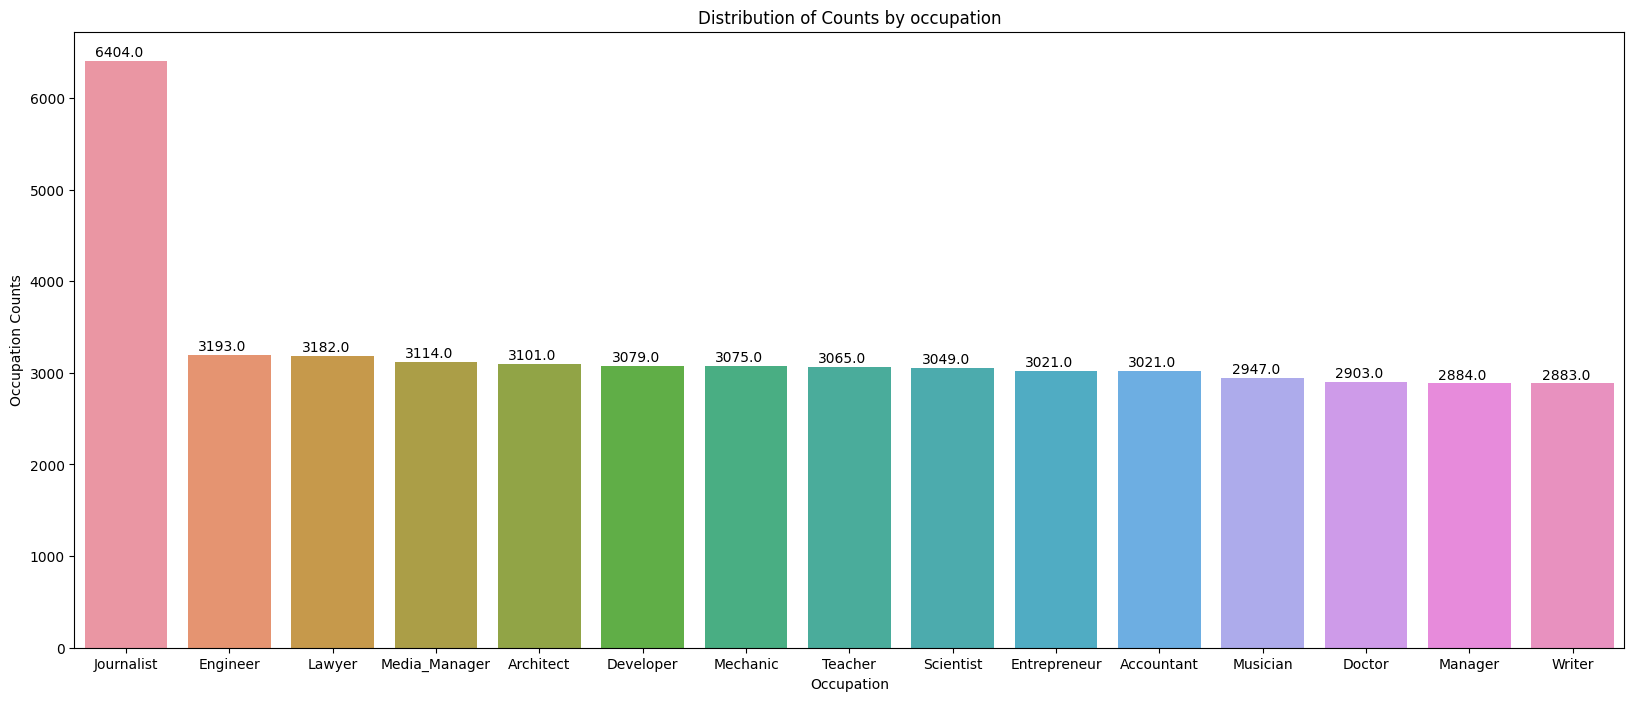

In [34]:
# Occupation
plt.figure(figsize=(20,8))
ax = sns.countplot(x='occupation', data=final_df_cat, order = final_df['occupation'].value_counts().index)
plt.title('Distribution of Counts by occupation')
plt.xlabel('Occupation')
plt.ylabel('Occupation Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

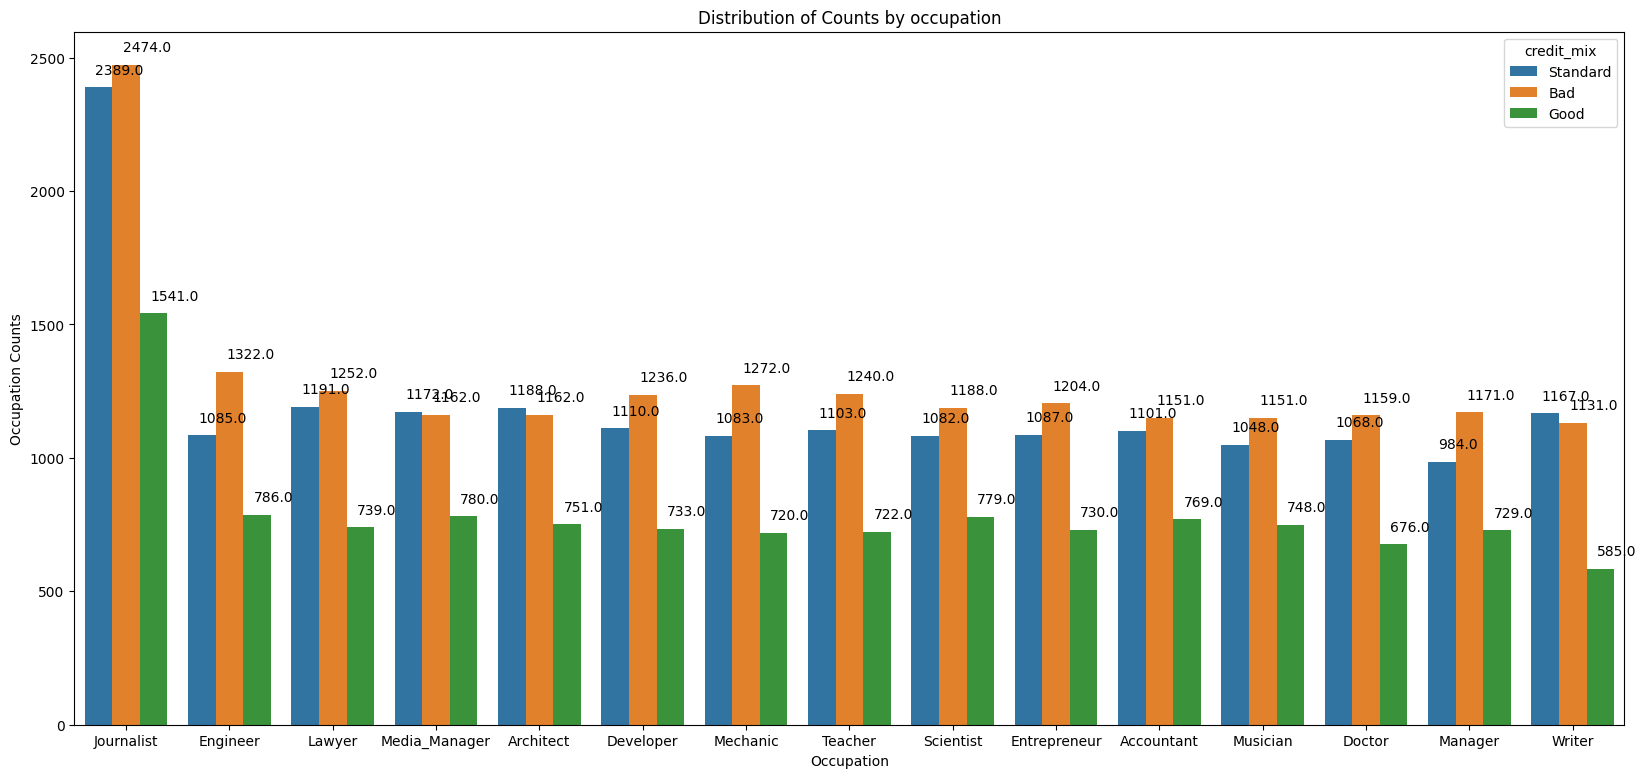

In [35]:
# Occupation
plt.figure(figsize=(20,9))
ax = sns.countplot(x='occupation', hue='credit_mix', data=final_df_cat, order = final_df['occupation'].value_counts().index)
plt.title('Distribution of Counts by occupation')
plt.xlabel('Occupation')
plt.ylabel('Occupation Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

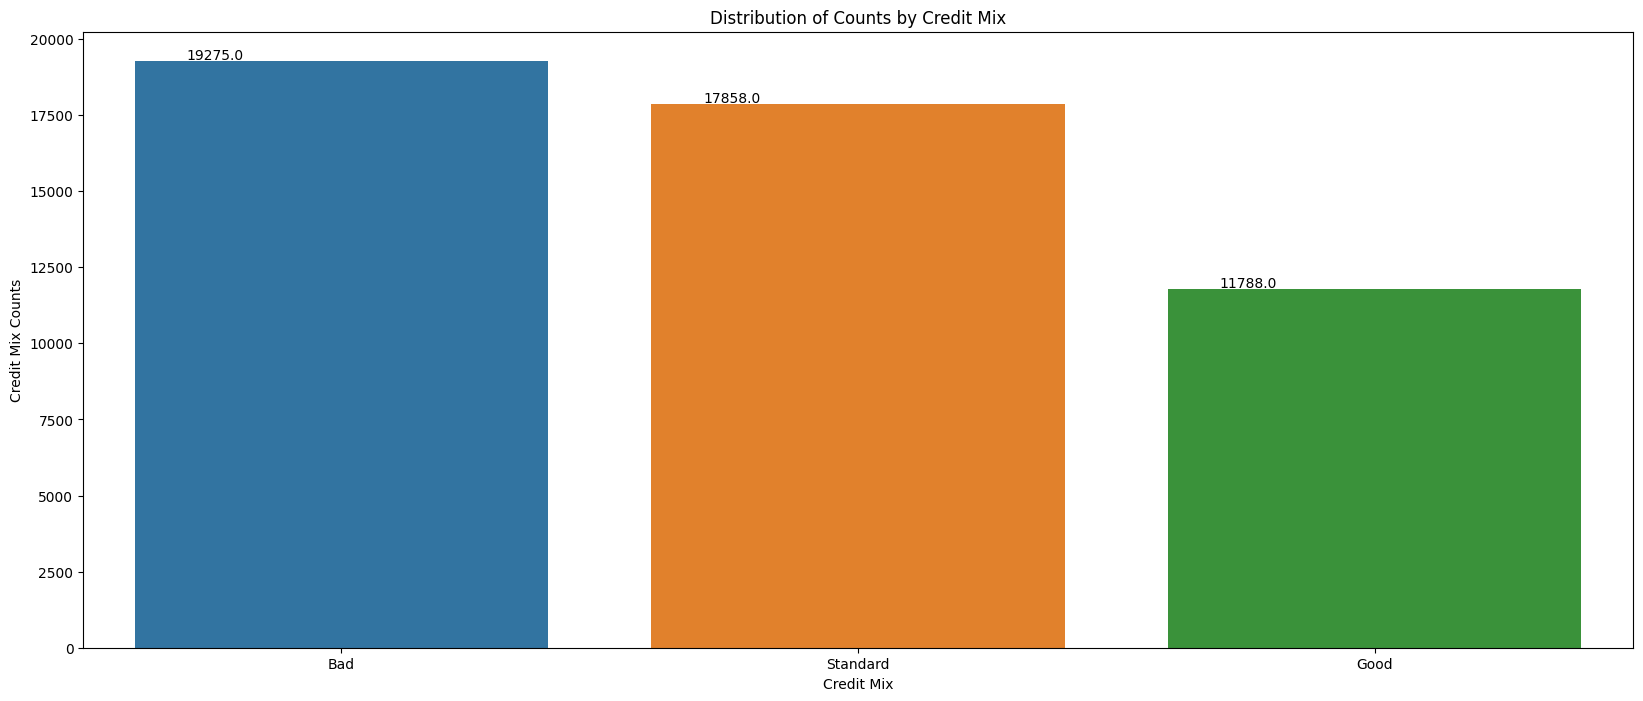

In [36]:
# Credit Mix
plt.figure(figsize=(20,8))
ax = sns.countplot(x='credit_mix', data=final_df_cat, order = final_df['credit_mix'].value_counts().index)
plt.title('Distribution of Counts by Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Credit Mix Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

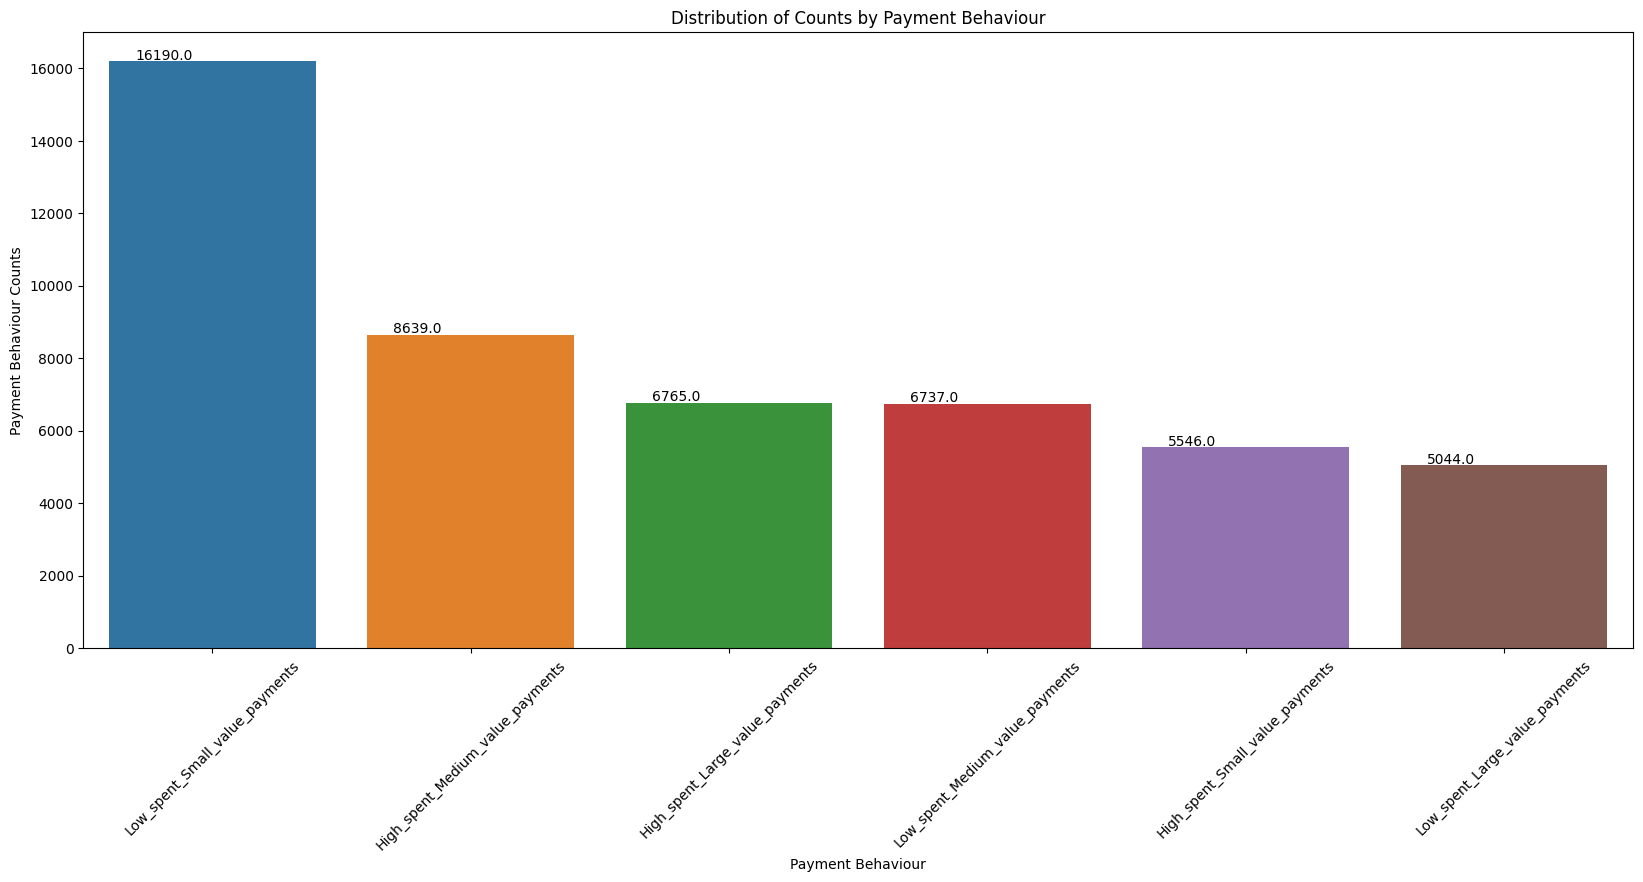

In [37]:
# Payment Behaviour
plt.figure(figsize=(20,8))
ax = sns.countplot(x='payment_behaviour', data=final_df_cat, order = final_df['payment_behaviour'].value_counts().index)
plt.title('Distribution of Counts by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Payment Behaviour Counts')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

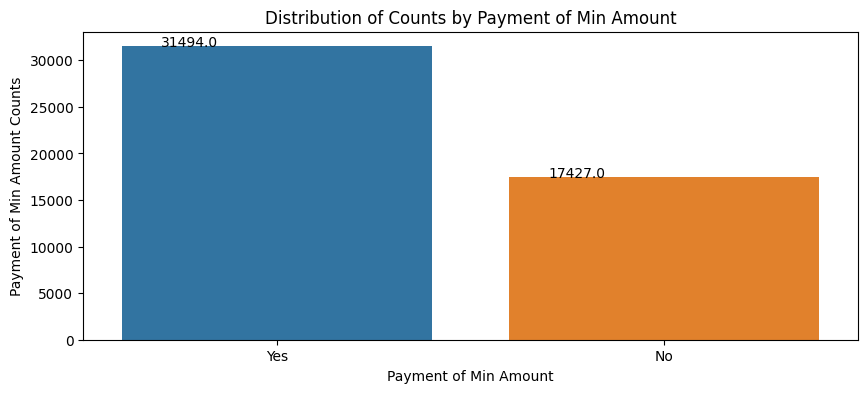

In [38]:
# Payment of Min Amount
plt.figure(figsize=(10,4))
ax = sns.countplot(x='payment_of_min_amount', data=final_df_cat, order = final_df['payment_of_min_amount'].value_counts().index)
plt.title('Distribution of Counts by Payment of Min Amount')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Payment of Min Amount Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Numerical Data

In [39]:
final_df_num.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance
count,48921.000000,4.892100e+04,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000,48921.000000
mean,120.997097,1.772278e+05,4011.885611,16.666851,22.077819,74.146788,10.609268,21.097198,29.868932,10.465922,27.226712,1428.385785,32.307257,1390.995806,611.616902,401.680852
std,695.806712,1.436506e+06,2954.415485,115.199873,126.755872,474.443601,61.025120,14.843610,218.623577,6.693580,190.913573,1160.470386,5.124297,8202.406472,1995.389870,213.179526
min,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,0.230000,20.719745,0.000000,0.000000,0.007760
25%,25.000000,1.931062e+04,1780.917917,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,565.280000,28.067120,30.319985,76.754827,270.526869
50%,33.000000,3.742416e+04,3080.353333,6.000000,6.000000,13.000000,3.000000,18.000000,14.000000,9.420000,6.000000,1160.070000,32.317434,68.934383,134.862980,336.194678
75%,42.000000,7.260832e+04,5351.113333,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.840000,9.000000,1950.620000,36.524225,162.343223,253.039359,468.242055
max,8698.000000,2.419806e+07,15204.633330,1798.000000,1497.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82256.000000,10000.000000,1602.040519


In [40]:
final_df_corr = final_df_num.corr()
final_df_corr

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance
age,1.000000,0.000658,0.010729,0.003394,-0.005380,-0.003884,0.000307,-0.015466,-0.000111,-0.001828,-0.002647,-0.000752,0.008789,-0.002708,0.002564,0.008611
annual_income,0.000658,1.000000,0.031475,-0.004716,-0.003423,-0.001139,-0.000614,-0.013970,0.004050,-0.002818,0.003182,-0.006163,0.008799,0.000008,-0.008148,0.021649
monthly_inhand_salary,0.010729,0.031475,1.000000,-0.008842,-0.004755,-0.002327,-0.006583,-0.226712,0.001609,-0.158159,-0.003721,-0.244990,0.160967,0.010558,0.057455,0.631895
num_bank_accounts,0.003394,-0.004716,-0.008842,1.000000,0.001385,-0.006193,0.000404,0.014875,-0.006103,0.011524,-0.002734,0.011480,-0.002778,0.007120,0.005982,-0.006366
num_credit_card,-0.005380,-0.003423,-0.004755,0.001385,1.000000,-0.008434,-0.001206,0.008679,0.008159,0.008752,-0.001389,0.007486,-0.006033,0.001718,-0.005383,-0.002424
interest_rate,-0.003884,-0.001139,-0.002327,-0.006193,-0.008434,1.000000,0.001453,0.012111,0.001173,-0.004357,0.001095,0.009659,0.006157,-0.000921,-0.000648,-0.002963
num_of_loan,0.000307,-0.000614,-0.006583,0.000404,-0.001206,0.001453,1.000000,0.009299,0.012934,0.015806,-0.001249,0.022731,0.001497,-0.004470,0.005542,-0.013829
delay_from_due_date,-0.015466,-0.013970,-0.226712,0.014875,0.008679,0.012111,0.009299,1.000000,0.009341,0.295100,0.014017,0.572478,-0.062197,-0.001388,-0.011401,-0.277010
num_of_delayed_payment,-0.000111,0.004050,0.001609,-0.006103,0.008159,0.001173,0.012934,0.009341,1.000000,0.008023,0.005148,0.007726,-0.004621,0.003144,-0.000692,-0.003616
changed_credit_limit,-0.001828,-0.002818,-0.158159,0.011524,0.008752,-0.004357,0.015806,0.295100,0.008023,1.000000,0.003545,0.467521,-0.048058,0.000190,-0.007364,-0.203890


<AxesSubplot: >

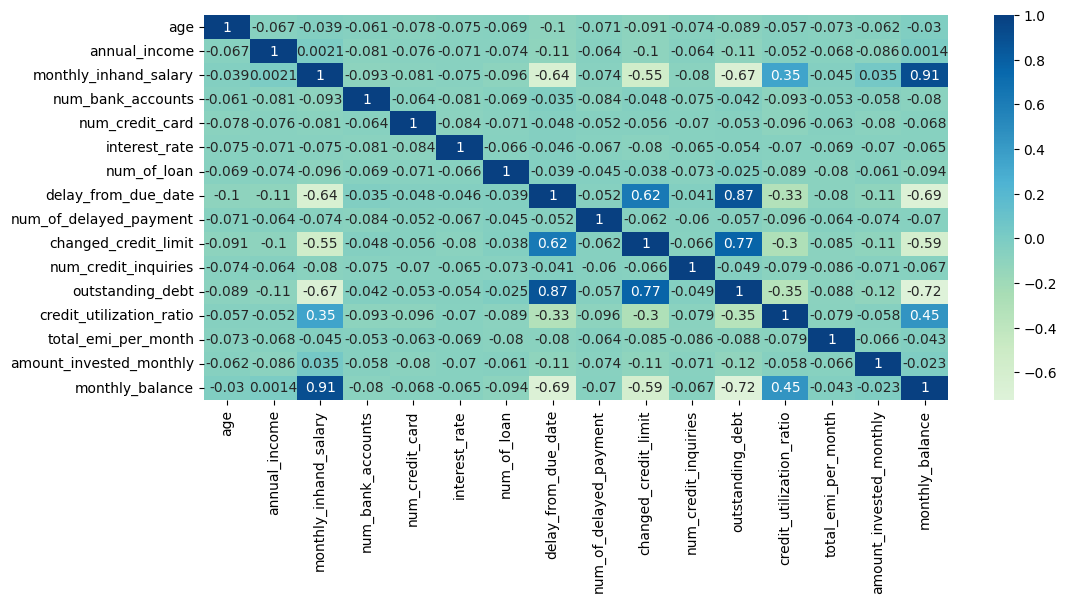

In [41]:
plt.figure(figsize=(12,5))
sns.heatmap(final_df_corr.corr(), cmap="GnBu", center=0, annot=True)

In [42]:
numeric_cols = final_df.select_dtypes(exclude="object").columns
cat_cols = final_df.select_dtypes(include="object").columns
numeric_cols

Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance'],
      dtype='object')

In [43]:
cat_cols

Index(['occupation', 'credit_mix', 'payment_of_min_amount',
       'payment_behaviour', 'credit_score'],
      dtype='object')

In [45]:
final_df_age = final_df['age'].tolist()

In [46]:
valid_age_mask = final_df['age'] <= 56

# Calculate the mode of the valid ages
mode_age = final_df.loc[valid_age_mask, 'age'].mode()[0]

# Replace invalid ages with the mean age
final_df.loc[~valid_age_mask, 'age'] = mode_age

In [47]:
final_df['age'].value_counts().sum()

48921

## Encoding to handle Categorical Data

In [48]:
final_df_cat.describe().T

,count,unique,top,freq
occupation,48921,15,Journalist,6404
credit_mix,48921,3,Bad,19275
payment_of_min_amount,48921,2,Yes,31494
payment_behaviour,48921,6,Low_spent_Small_value_payments,16190
credit_score,48921,3,Standard,26120


In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48921 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       48921 non-null  float64
 1   occupation                48921 non-null  object 
 2   annual_income             48921 non-null  float64
 3   monthly_inhand_salary     48921 non-null  float64
 4   num_bank_accounts         48921 non-null  int64  
 5   num_credit_card           48921 non-null  int64  
 6   interest_rate             48921 non-null  int64  
 7   num_of_loan               48921 non-null  float64
 8   delay_from_due_date       48921 non-null  int64  
 9   num_of_delayed_payment    48921 non-null  float64
 10  changed_credit_limit      48921 non-null  float64
 11  num_credit_inquiries      48921 non-null  float64
 12  credit_mix                48921 non-null  object 
 13  outstanding_debt          48921 non-null  float64
 14  credit

In [50]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
for i in ["occupation","payment_behaviour","credit_mix","payment_of_min_amount","credit_score"]:
    final_df[i]=la.fit_transform(final_df[i])
final_df.head()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,30.0,7,18859.380,1360.61500,6,4,5640,4.0,14,15.0,9.41,6.0,2,330.26,27.911640,1,40.292010,59.606647,3,306.162843,2
1,39.0,14,46477.560,4059.13000,7,10,24,6.0,46,22.0,6.67,12.0,0,1799.87,32.851676,1,212.248190,109.409292,1,334.255517,1
2,52.0,9,153147.640,12915.30333,5,4,3,1.0,3,14.0,11.24,1.0,1,1222.96,40.264738,0,81.918963,152.908747,1,1306.702624,1
3,39.0,3,16833.105,1542.75875,5,5,4,4.0,7,15.0,5.99,6.0,1,35.71,30.634617,0,51.702938,160.069253,5,232.503683,0
4,31.0,10,131693.370,10696.44750,0,7,10,3.0,27,3.0,1.78,6.0,1,1428.94,29.807968,0,208.858473,1084.704299,4,56.081978,2


In [51]:
final_df["credit_score"] = final_df["credit_score"].astype(float)

In [52]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48921 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       48921 non-null  float64
 1   occupation                48921 non-null  int32  
 2   annual_income             48921 non-null  float64
 3   monthly_inhand_salary     48921 non-null  float64
 4   num_bank_accounts         48921 non-null  int64  
 5   num_credit_card           48921 non-null  int64  
 6   interest_rate             48921 non-null  int64  
 7   num_of_loan               48921 non-null  float64
 8   delay_from_due_date       48921 non-null  int64  
 9   num_of_delayed_payment    48921 non-null  float64
 10  changed_credit_limit      48921 non-null  float64
 11  num_credit_inquiries      48921 non-null  float64
 12  credit_mix                48921 non-null  int32  
 13  outstanding_debt          48921 non-null  float64
 14  credit

In [53]:
missing_values = final_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64


In [54]:
final_df.head(10)

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,30.0,7,18859.380,1360.615000,6,4,5640,4.0,14,15.0,9.41,6.0,2,330.26,27.911640,1,40.292010,59.606647,3,306.162843,2.0
1,39.0,14,46477.560,4059.130000,7,10,24,6.0,46,22.0,6.67,12.0,0,1799.87,32.851676,1,212.248190,109.409292,1,334.255517,1.0
2,52.0,9,153147.640,12915.303330,5,4,3,1.0,3,14.0,11.24,1.0,1,1222.96,40.264738,0,81.918963,152.908747,1,1306.702624,1.0
3,39.0,3,16833.105,1542.758750,5,5,4,4.0,7,15.0,5.99,6.0,1,35.71,30.634617,0,51.702938,160.069253,5,232.503683,0.0
4,31.0,10,131693.370,10696.447500,0,7,10,3.0,27,3.0,1.78,6.0,1,1428.94,29.807968,0,208.858473,1084.704299,4,56.081978,2.0
5,33.0,5,22233.980,1933.831667,5,6,3,4.0,5,0.0,10.24,2.0,1,1320.47,36.968991,0,39.598024,195.695771,5,248.089372,2.0
6,36.0,3,19590.310,1408.525833,3,7,14,2.0,10,8.0,19.24,4.0,2,1131.45,29.685692,1,31.474949,23.660323,5,335.717311,2.0
7,26.0,6,71203.400,6132.616667,7,6,20,5.0,20,14.0,12.26,9.0,2,1254.91,34.552334,1,235.515469,425.960914,2,211.785284,1.0
8,28.0,9,142177.840,3080.353333,5,1,12,3.0,14,7.0,2.41,2.0,1,483.13,29.912654,0,322.876080,1403.317923,5,336.194678,0.0
9,29.0,14,19212.790,1817.065833,6,8,18,4.0,27,9.0,7.12,11.0,2,1755.06,27.927917,1,48.503603,125.626288,5,287.576692,1.0


In [55]:
#splitting data into x and y
X = final_df.drop(["credit_score"],axis=1)
y = final_df.loc[:,["credit_score"]].values
y = y.ravel()

In [56]:
# spiliting the dataset into train data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## Model Creation- Decision Tree Method

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5]
}

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=10,scoring='accuracy',error_score='raise')

In [63]:
fit_cv = cv.fit(X_train,y_train)

In [64]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [65]:
np.set_printoptions(threshold=np.inf)
y_pred = cv.predict(X_test)
print(y_pred)

[0. 1. 0. 2. 2. 2. 2. 2. 1. 2. 2. 0. 2. 0. 2. 0. 2. 1. 1. 0. 1. 2. 0. 2.
 0. 2. 1. 2. 0. 1. 2. 2. 2. 2. 0. 2. 2. 0. 2. 1. 2. 2. 2. 0. 1. 1. 2. 0.
 2. 1. 2. 1. 0. 2. 0. 2. 1. 2. 0. 2. 0. 0. 1. 0. 2. 2. 0. 0. 0. 2. 2. 1.
 2. 2. 2. 2. 0. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2. 0. 1. 2. 2. 1. 1. 1. 2. 1.
 2. 2. 2. 1. 0. 0. 1. 2. 1. 2. 0. 2. 2. 0. 0. 1. 1. 2. 1. 2. 1. 2. 2. 1.
 2. 1. 2. 0. 2. 1. 2. 0. 2. 0. 2. 2. 1. 2. 0. 2. 0. 2. 1. 0. 1. 2. 2. 1.
 2. 2. 1. 1. 2. 2. 0. 2. 1. 0. 2. 1. 2. 2. 1. 2. 2. 0. 1. 1. 0. 0. 2. 2.
 0. 1. 2. 0. 2. 2. 1. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 1. 1. 2. 0. 0. 2. 0. 2. 2. 1. 1. 2. 2. 0. 2. 0. 1. 0. 1. 1. 1. 0. 0. 2.
 0. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 0. 2. 0. 2. 0. 2. 1. 2. 2. 2. 1. 2. 0.
 1. 2. 1. 2. 0. 2. 2. 2. 2. 2. 1. 0. 2. 0. 0. 0. 1. 1. 2. 0. 2. 2. 2. 1.
 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 0. 1. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2.
 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 0. 0. 0. 2. 2. 2. 1. 2. 2.
 2. 2. 0. 2. 2. 2. 2. 0. 1. 2. 1. 1. 2. 1. 2. 2. 0.

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
matrix_dectr = confusion_matrix(y_test,y_pred)
print(matrix_dectr)

[[1315   80  321]
 [ 287 1752  776]
 [1026  603 3625]]


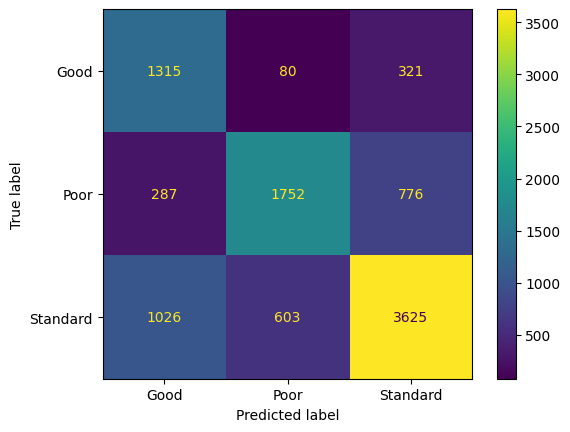

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
labels=['Good','Poor','Standard']
cmd_dectr=ConfusionMatrixDisplay(matrix_dectr,display_labels=labels)
cmd_dectr.plot()

In [68]:
score2 = print('Accuracy score obtained using Decision Tree: ',accuracy_score(y_test,y_pred))

Accuracy score obtained using Decision Tree:  0.683903934593766


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.77      0.61      1716
         1.0       0.72      0.62      0.67      2815
         2.0       0.77      0.69      0.73      5254

    accuracy                           0.68      9785
   macro avg       0.66      0.69      0.67      9785
weighted avg       0.71      0.68      0.69      9785



## Model Training - Random Forest Method

In [70]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold

In [71]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [72]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [73]:
best_rf = grid_search.best_estimator_
best_rf

RandomForestClassifier(max_depth=30, n_estimators=300)

In [74]:
np.set_printoptions(threshold=np.inf)
y_pred_rf = grid_search.predict(X_test)
print(y_pred_rf)

[0. 1. 1. 2. 2. 2. 1. 2. 1. 2. 2. 0. 2. 0. 2. 0. 2. 1. 0. 2. 1. 2. 0. 2.
 0. 2. 1. 2. 0. 1. 2. 2. 1. 2. 0. 1. 1. 0. 2. 2. 2. 1. 1. 0. 1. 1. 2. 0.
 2. 1. 2. 0. 0. 2. 0. 2. 1. 0. 0. 1. 2. 2. 1. 2. 2. 2. 0. 0. 0. 1. 2. 1.
 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 0. 1. 2. 2. 1. 1. 1. 2. 1.
 1. 2. 2. 1. 2. 2. 0. 2. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1.
 2. 1. 2. 0. 2. 1. 2. 0. 2. 0. 2. 2. 1. 2. 0. 2. 2. 2. 1. 2. 0. 2. 2. 1.
 2. 2. 2. 1. 2. 2. 0. 2. 1. 0. 2. 1. 2. 2. 1. 2. 1. 0. 1. 1. 2. 0. 1. 2.
 2. 1. 2. 0. 2. 2. 1. 2. 0. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 1. 1. 2. 2. 0. 2. 2. 2. 2. 1. 1. 2. 2. 0. 2. 0. 1. 2. 1. 1. 1. 0. 2. 2.
 0. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 1. 2. 2. 2. 1. 2. 0.
 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 0. 2. 0. 0. 2. 1. 1. 2. 2. 1. 2. 2. 1.
 2. 1. 1. 1. 1. 2. 2. 0. 2. 2. 1. 2. 0. 1. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 0. 2. 2. 2. 1. 1. 2.
 2. 2. 0. 2. 1. 2. 2. 0. 1. 2. 1. 1. 2. 1. 1. 2. 2.

In [75]:
matrix_rf = confusion_matrix(y_test,y_pred_rf)
print(matrix_rf)

[[1203   27  486]
 [  99 2152  564]
 [ 435  656 4163]]


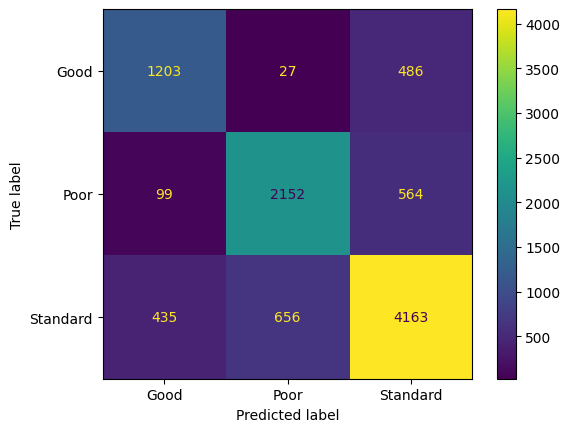

In [76]:
labels=['Good','Poor','Standard']
cmd_rf=ConfusionMatrixDisplay(matrix_rf,display_labels=labels)
cmd_rf.plot()

In [77]:
score2 = print('Accuracy score obtained using Decision Random Forest: ',accuracy_score(y_test,y_pred_rf))

Accuracy score obtained using Decision Random Forest:  0.7683188553909045


In [78]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.69      0.70      0.70      1716
         1.0       0.76      0.76      0.76      2815
         2.0       0.80      0.79      0.80      5254

    accuracy                           0.77      9785
   macro avg       0.75      0.75      0.75      9785
weighted avg       0.77      0.77      0.77      9785

